********************************************************
* <b>Author:</b>- Sunil Sharanappa
* <b>Linked in:</b>- https://www.linkedin.com/in/sunil-sharanappa/
* <b>Refered materials:</b>- Krish Naik, GeeksforGeeks
**********************************************************

In [37]:
#Importing Libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.pyplot as plt
% matplotlib inline
matplotlib.style.use('ggplot')
import scipy.stats as stat
import pylab
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from scipy import stats


### Preparing a DataFrame to try out All Features Transformation

In [81]:
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 2000), np.random.normal(1, 1, 20)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 1, 2000), np.random.normal(50, 1, 20)]),
})
  
x

,x1,x2
0,20.261614,28.271303
1,18.837339,28.306455
2,18.804585,28.948562
3,18.291520,31.446469
4,19.758287,29.914319
...,...,...
2015,-1.087867,50.853049
2016,2.874421,52.017956
2017,0.052612,50.468020
2018,-0.115012,48.970038


## <b>Q-Q plot</b>
* If you want to check whether feature is guassian or normal distributed

In [3]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

# <b><u>01.MinMax Scaler:-</u></b>
*	MinMaxScaler(feature_range = (0, 1)) will transform each value in the column proportionally within the range [0,1]. Use this as the first scaler choice to transform a feature, as it will preserve the shape of the dataset (no distortion).

*	MinMaxScaler preserves the shape of the original distribution. It does not meaningfully change the information embedded in the original data.Note that MinMaxScaler doesn’t reduce the importance of outliers.The default range for the feature returned by MinMaxScaler is 0 to 1.


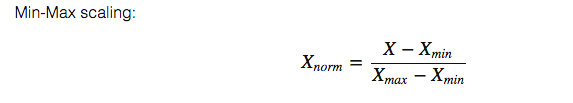
* <b>Min Max Scaling scales the values between 0 to 1.</b> 
* <b>X_scaled = (X - X.min / (X.max - X.min)</b>

In [22]:
min_max=MinMaxScaler()
# Scaled feature
x_after_min_max_scaler = min_max_scaler.fit_transform(x)
x_after_min_max_scaler = pd.DataFrame(x_after_min_max_scaler, columns =['x1', 'x2'])
  
print ("\nAfter min max Scaling : \n", x_after_min_max_scaler)

## Visualizing the impact of MinMax Scaling

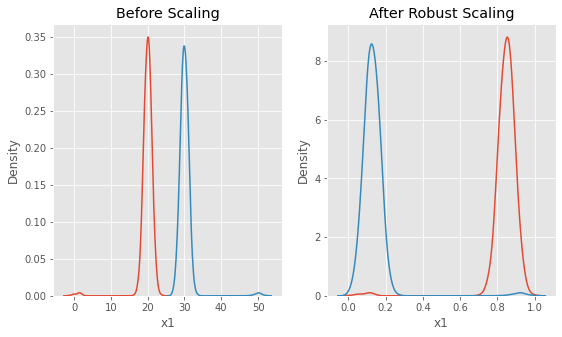

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(9, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(x['x1'], ax = ax1)
sns.kdeplot(x['x2'], ax = ax1)
ax2.set_title('After MinMax Scaling')
sns.kdeplot(x_after_min_max_scaler['x1'], ax = ax2)
sns.kdeplot(x_after_min_max_scaler['x2'], ax = ax2)

* <b>If all the points on Pobability plot alligned on the straight line then we can say it's normally distrubuted.
* In the below as you can see both the columns are not normally distributed.

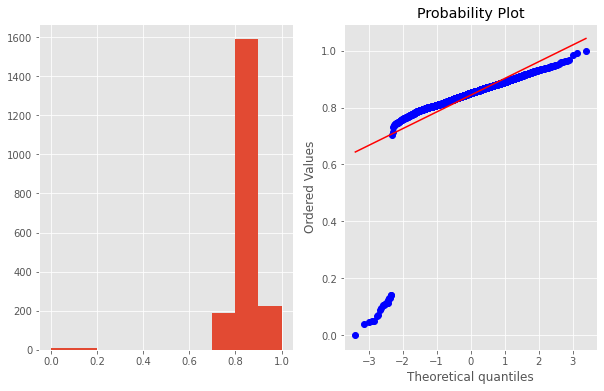

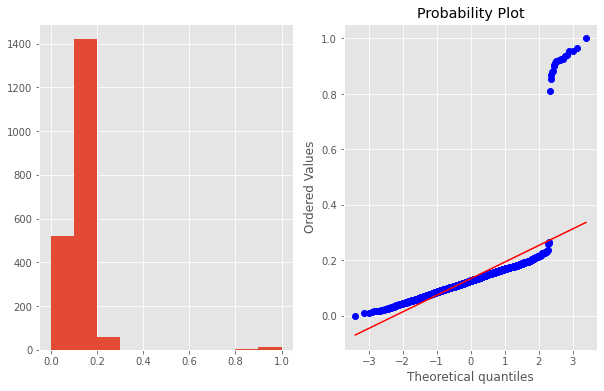

In [17]:
plot_data(x_after_min_max_scaler,'x1')
plot_data(x_after_min_max_scaler,'x2')

# <b><u>2.Standard Scaler:-</u></b> 
* StandardScaler follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance.
*	The StandardScaler assumes your data is normally distributed within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of 1.
*	If data is not normally distributed, this is not the best scaler to use.
*	The mean and standard deviation are calculated for the feature and then the feature is scaled based on:

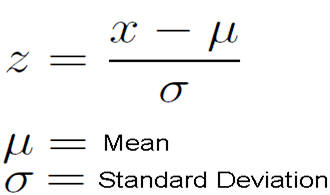

In [29]:
scaler=StandardScaler()
# Scaled feature
x_after_standard_scaler = scaler.fit_transform(x)
x_after_standard_scaler = pd.DataFrame(x_after_standard_scaler, columns =['x1', 'x2'])
  
print ("\nAfter Standard Scaling : \n", x_after_standard_scaler)


After Standard Scaling : 
             x1        x2
0     0.004124 -0.917798
1     0.501035 -0.226473
2     0.028453  0.051144
3     0.618275  1.027075
4     0.074344 -0.236350
...        ...       ...
2015 -9.114188  8.592628
2016 -8.584922  8.703110
2017 -8.809148  9.577939
2018 -8.730749  8.774798
2019 -8.449299  8.647676

[2020 rows x 2 columns]


## Visualizing the impact of Standard Scaling

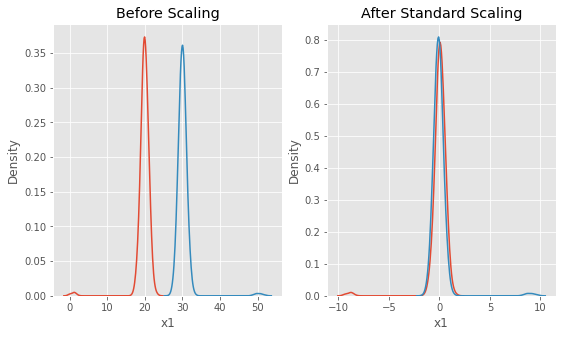

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(9, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(x['x1'], ax = ax1)
sns.kdeplot(x['x2'], ax = ax1)
ax2.set_title('After Standard Scaling')
sns.kdeplot(x_after_standard_scaler['x1'], ax = ax2)
sns.kdeplot(x_after_standard_scaler['x2'], ax = ax2)

* <b>If all the points on Pobability plot alligned on the straight line then we can say it's normally distrubuted.
* In the below as you can see both the columns are not normally distributed.

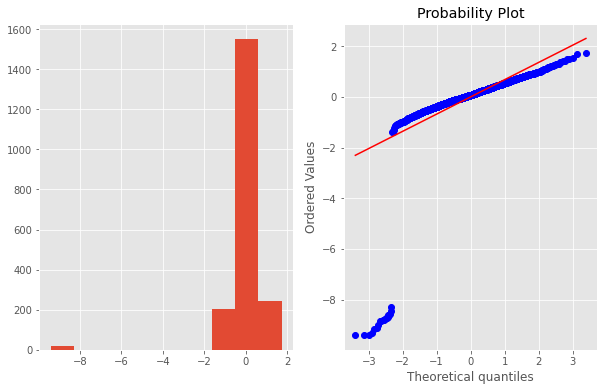

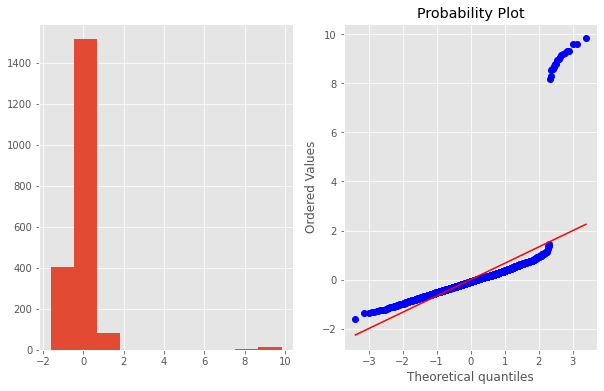

In [27]:
plot_data(x_after_standard_scaler,'x1')
plot_data(x_after_standard_scaler,'x2')

# <b><u>3.RobustScaler:-</u></b> 
*	RobustScaler transforms the feature vector by subtracting the median and then dividing by the interquartile range (75% value — 25% value).
*	It scales features using statistics that are robust to outliers. This method removes the median and scales the data in the range between 1st quartile and 3rd quartile. i.e., in between 25th quantile and 75th quantile range. This range is also called an Interquartile range(IQR).

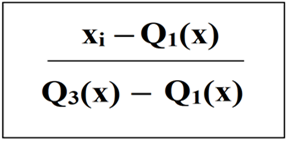

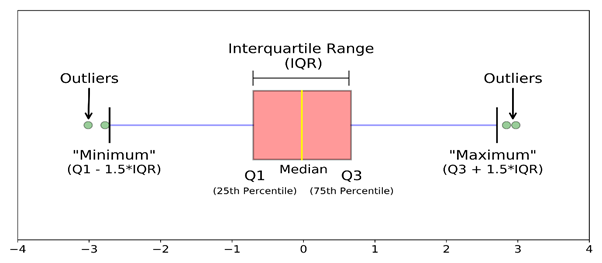


In [30]:
scaler=RobustScaler()
robust_scaled_df = scaler.fit_transform(x)
robust_scaled_df = pd.DataFrame(robust_scaled_df, columns =['x1', 'x2'])

print ("\nAfter Robust Scaling : \n", robust_scaled_df)


After Robust Scaling : 
              x1         x2
0     -0.110347  -1.415838
1      0.703662  -0.245189
2     -0.070494   0.224912
3      0.895717   1.877495
4      0.004683  -0.261913
...         ...        ...
2015 -15.047421  14.688559
2016 -14.180408  14.875643
2017 -14.547722  16.357027
2018 -14.419294  14.997035
2019 -13.958239  14.781775

[2020 rows x 2 columns]


## Visualizing the impact of Robust Scaling

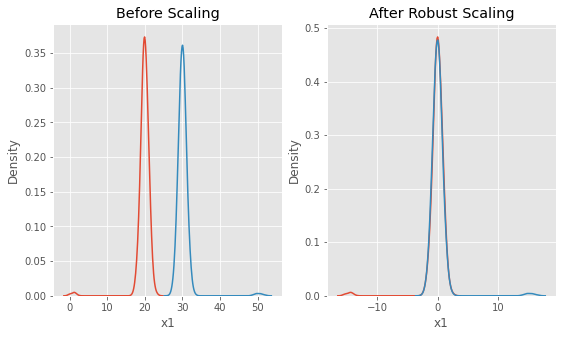

In [31]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(9, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(x['x1'], ax = ax1)
sns.kdeplot(x['x2'], ax = ax1)
ax2.set_title('After Robust Scaling')
sns.kdeplot(robust_scaled_df['x1'], ax = ax2)
sns.kdeplot(robust_scaled_df['x2'], ax = ax2)

* <b>If all the points on Pobability plot alligned on the straight line then we can say it's normally distrubuted.
* In the below as you can see both the columns are not normally distributed.

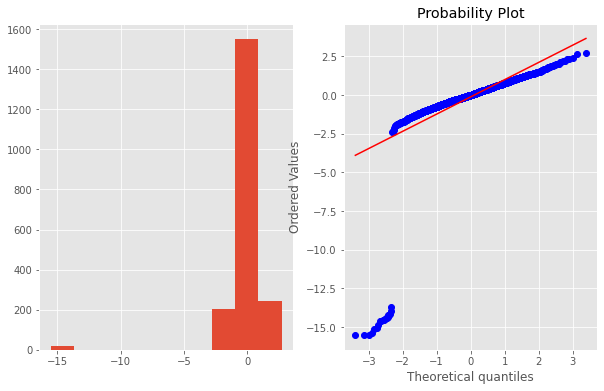

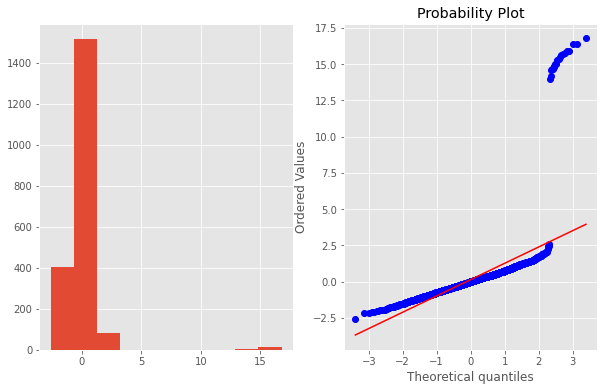

In [32]:
plot_data(robust_scaled_df,'x1')
plot_data(robust_scaled_df,'x2')

# 4.Guassian Transformation

* logarithmic transformation
* reciprocal transformation
* square root transformation
* exponential transformation (more general, you can use any exponent)
* boxcox transformation

## <b>a) Logarithmic Transformation</b>

* Log transformation is a data transformation method in which it replaces each variable x with a <b>log(x)</b>. 
* The log transformation reduces or removes the skewness of our original data. The important caveat here is that the <b>original data has to follow or approximately follow a log-normal distribution</b>. Otherwise, the log transformation won’t work.

In [5]:
logarithimic_transformation_df=np.log(x)
logarithimic_transformation_df = pd.DataFrame(logarithimic_transformation_df, columns =['x1', 'x2'])
print ("\n Logarithimic Transformation : \n", logarithimic_transformation_df)


 Logarithimic Transformation : 
             x1        x2
0     2.986207  3.361351
1     3.054266  3.399408
2     3.072098  3.420767
3     2.993451  3.358857
4     2.975527  3.423169
...        ...       ...
2015  0.785661  3.894587
2016  0.630541  3.926684
2017  0.445057  3.926422
2018  0.985268  3.920876
2019  0.466911  3.911165

[2020 rows x 2 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


### Visualizing the impact of logarithimic transformation

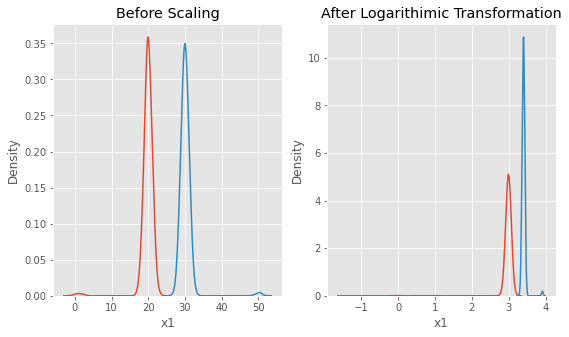

In [6]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(9, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(x['x1'], ax = ax1)
sns.kdeplot(x['x2'], ax = ax1)
ax2.set_title('After Logarithimic Transformation')
sns.kdeplot(logarithimic_transformation_df['x1'], ax = ax2)
sns.kdeplot(logarithimic_transformation_df['x2'], ax = ax2)

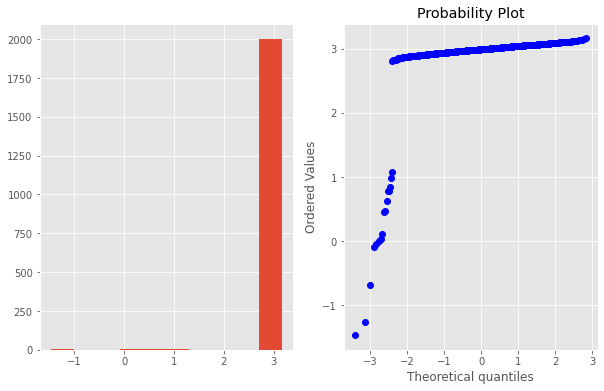

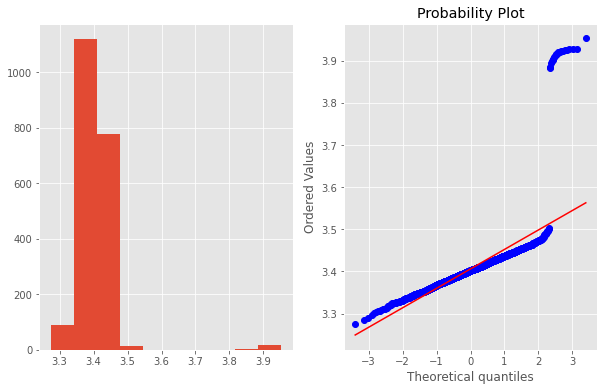

In [7]:
plot_data(logarithimic_transformation_df,'x1')
plot_data(logarithimic_transformation_df,'x2')

## <b> b) Reciprocal Transformation</b>

* Reciprocal Transformation. The reciprocal transformation is defined as the transformation of x to 1/x.
* The transformation has a dramatic effect on the shape of the distribution, reversing the order of values with the same sign. The transformation can only be used for non-zero values

In [9]:
reciprocal_transformation_df=1/x
reciprocal_transformation_df = pd.DataFrame(reciprocal_transformation_df, columns =['x1', 'x2'])
print ("\n Reciprocal Transformation : \n", reciprocal_transformation_df)


 Reciprocal Transformation : 
             x1        x2
0     0.050479  0.034688
1     0.047157  0.033393
2     0.046324  0.032687
3     0.050114  0.034775
4     0.051021  0.032609
...        ...       ...
2015  0.455818  0.020352
2016  0.532304  0.019709
2017  0.640788  0.019714
2018  0.373339  0.019824
2019  0.626936  0.020017

[2020 rows x 2 columns]


### Visualizing the impact of Reciprocal Transformation

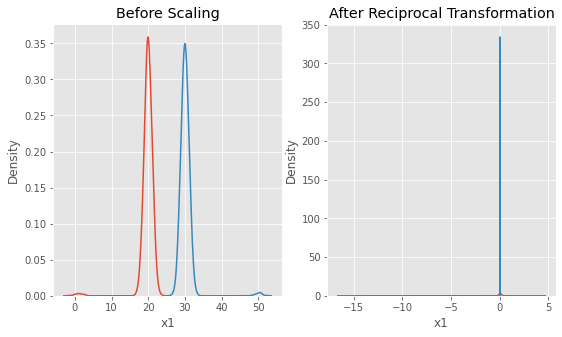

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(9, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(x['x1'], ax = ax1)
sns.kdeplot(x['x2'], ax = ax1)
ax2.set_title('After Reciprocal Transformation')
sns.kdeplot(reciprocal_transformation_df['x1'], ax = ax2)
sns.kdeplot(reciprocal_transformation_df['x2'], ax = ax2)

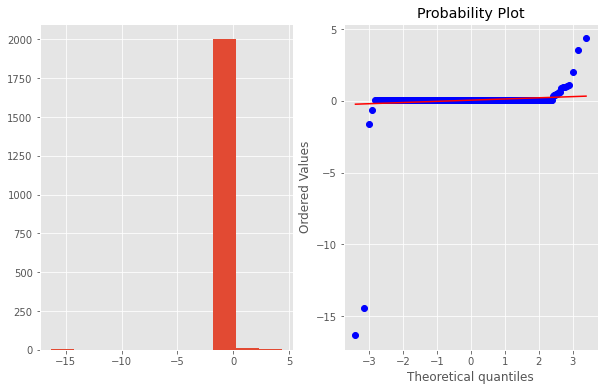

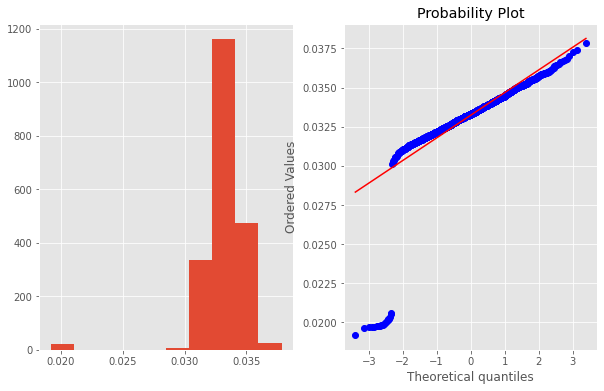

In [11]:
plot_data(reciprocal_transformation_df,'x1')
plot_data(reciprocal_transformation_df,'x2')

## c) <b>Square root transformation</b>

* The square root, <b>x to x^(1/2) = sqrt(x)</b>, is a transformation with a moderate effect on distribution shape: it is weaker than the logarithm and the cube root.
*It is also used for reducing right skewness, and also has the advantage that it can be applied to zero values.

In [18]:
squareroot_transformation_df=x**(1/2)
squareroot_transformation_df = pd.DataFrame(squareroot_transformation_df, columns =['x1', 'x2'])
print ("\n Square Root Transformation : \n", squareroot_transformation_df)


 Square Root Transformation : 
             x1        x2
0     4.450887  5.369183
1     4.604955  5.472326
2     4.646198  5.531081
3     4.467038  5.362490
4     4.427182  5.537729
...        ...       ...
2015  1.481167  7.009691
2016  1.370630  7.123093
2017  1.249231  7.122159
2018  1.636622  7.102439
2019  1.262957  7.068037

[2020 rows x 2 columns]


### Visualizing the impact of Square Root Transformation

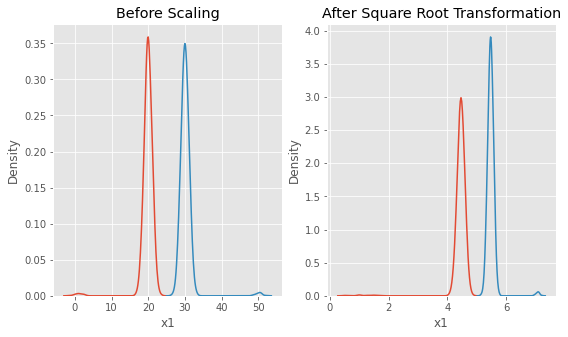

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(9, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(x['x1'], ax = ax1)
sns.kdeplot(x['x2'], ax = ax1)
ax2.set_title('After Square Root Transformation')
sns.kdeplot(squareroot_transformation_df['x1'], ax = ax2)
sns.kdeplot(squareroot_transformation_df['x2'], ax = ax2)

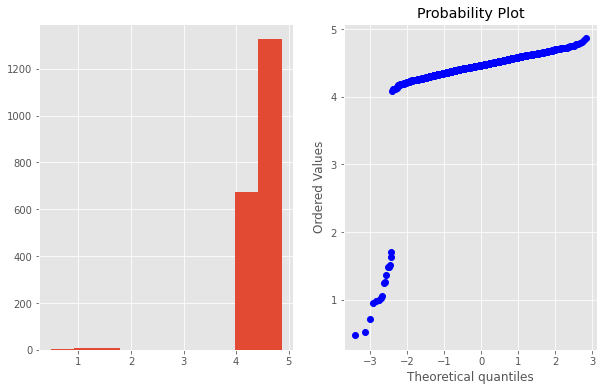

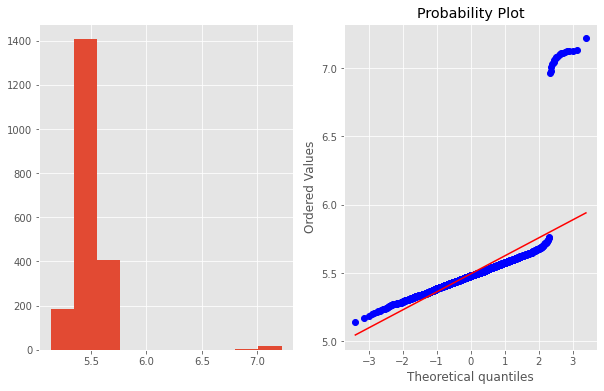

In [20]:
plot_data(squareroot_transformation_df,'x1')
plot_data(squareroot_transformation_df,'x2')

## <b>d) exponential transformation:-</b>



In [21]:
exponential_transformation_df=x**(1/1.2)
exponential_transformation_df = pd.DataFrame(exponential_transformation_df, columns =['x1', 'x2'])
print ("\n Exponential Transformation : \n", exponential_transformation_df)


 Exponential Transformation : 
              x1         x2
0     12.043266  16.463177
1     12.746053  16.993648
2     12.936879  17.298831
3     12.116191  16.428988
4     11.936554  17.333498
...         ...        ...
2015   1.924599  25.674268
2016   1.691221  26.370255
2017   1.449010  26.364493
2018   2.272901  26.242942
2019   1.475641  26.031427

[2020 rows x 2 columns]


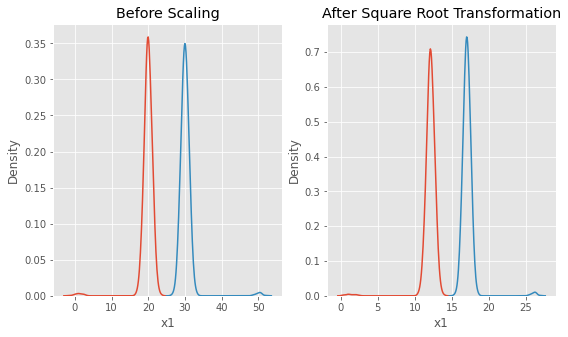

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(9, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(x['x1'], ax = ax1)
sns.kdeplot(x['x2'], ax = ax1)
ax2.set_title('After Exponential Transformation')
sns.kdeplot(exponential_transformation_df['x1'], ax = ax2)
sns.kdeplot(exponential_transformation_df['x2'], ax = ax2)

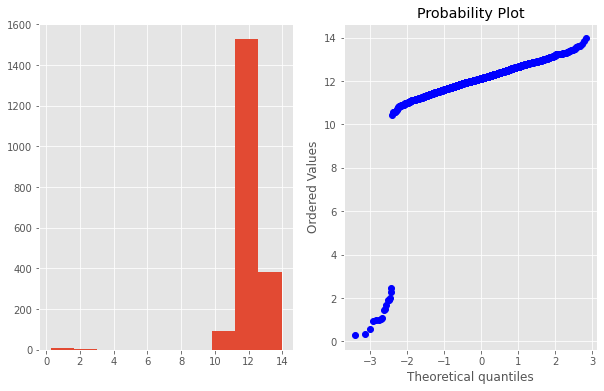

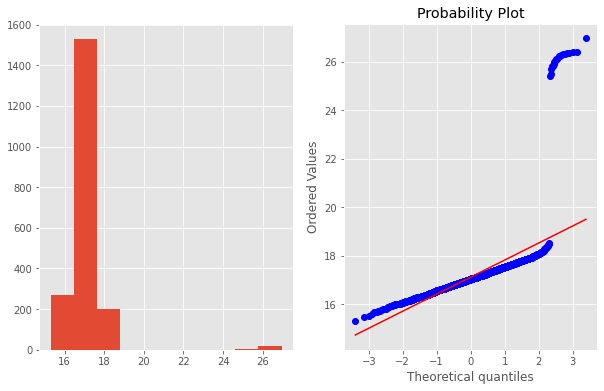

In [24]:
plot_data(exponential_transformation_df,'x1')
plot_data(exponential_transformation_df,'x2')

## <b>e) Boxcox transformation</b>

* Many machine learning algorithms prefer or perform better when numerical variables have a Gaussian probability distribution.
* Power transforms are a technique for transforming numerical input or output variables to have a Gaussian or more-Gaussian-like probability distribution.
* How to use the PowerTransform in scikit-learn to use the Box-Cox and Yeo-Johnson transforms when preparing data for predictive modeling.
* It is a power transform that assumes the values of the input variable to which it is applied are strictly positive. That means 0 and negative values are not supported.

In [79]:
print(boxcox_transformation_df01.count())
print(boxcox_transformation_df02.count())

boxcox_transformation_df01



x1    2020
dtype: int64
x2    2020
dtype: int64


,x1
0,60677.388541
1,80567.899589
2,86781.112343
3,62536.500108
4,58036.842749
...,...
2015,6.094750
2016,3.079547
2017,1.292811
2018,14.310143


In [80]:

fitted_data, fitted_lambda = stats.boxcox(abs(x.x1))
fitted_data01, fitted_lambda01 = stats.boxcox(x.x2)

boxcox_transformation_df01 = pd.DataFrame(fitted_data, columns =['x1'])
boxcox_transformation_df02 = pd.DataFrame(fitted_data01, columns =['x2'])
#boxcox_transformation_df03=pd.append([boxcox_transformation_df01, boxcox_transformation_df02], ignore_index=True)
#boxcox_transformation_df03=boxcox_transformation_df01.append(boxcox_transformation_df02, ignore_index=True)
boxcox_transformation_df03= pd.concat([boxcox_transformation_df01, boxcox_transformation_df02], ignore_index=True, sort=False)

boxcox_transformation_df=boxcox_transformation_df03
#print ("\n Boxcox Transformation : \n", boxcox_transformation_df03)


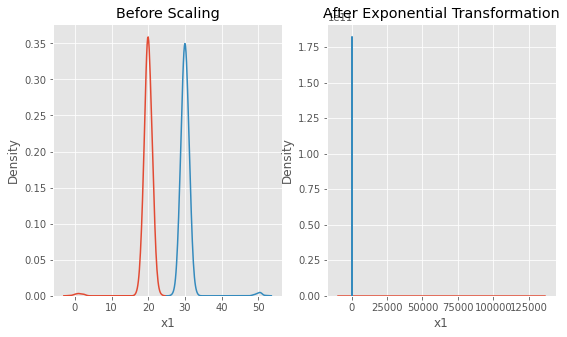

In [54]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(9, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(x['x1'], ax = ax1)
sns.kdeplot(x['x2'], ax = ax1)
ax2.set_title('After Exponential Transformation')
sns.kdeplot(boxcox_transformation_df['x1'], ax = ax2)
sns.kdeplot(boxcox_transformation_df['x2'], ax = ax2)

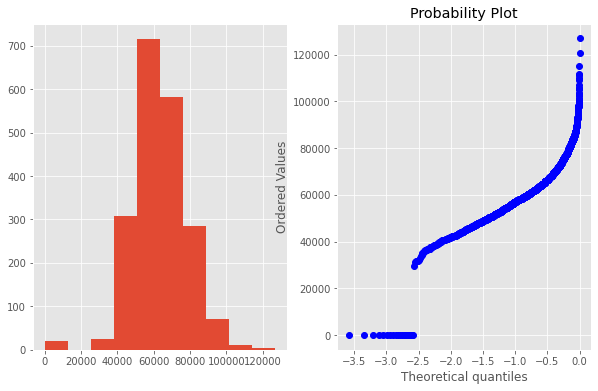

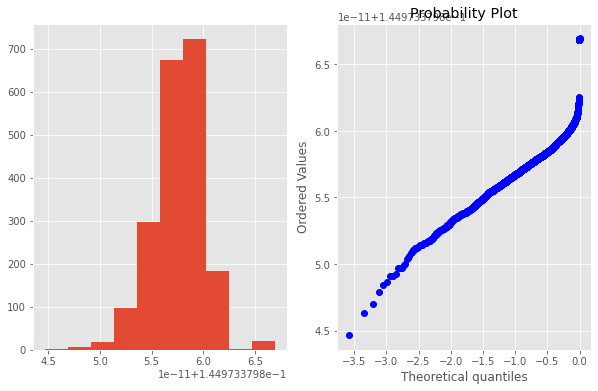

In [55]:
plot_data(boxcox_transformation_df,'x1')
plot_data(boxcox_transformation_df,'x2')

In [12]:
x**(1/2)

,x1,x2
0,4.450887,5.369183
1,4.604955,5.472326
2,4.646198,5.531081
3,4.467038,5.362490
4,4.427182,5.537729
...,...,...
2015,1.481167,7.009691
2016,1.370630,7.123093
2017,1.249231,7.122159
2018,1.636622,7.102439


In [15]:
x**(2)

,x1,x2
0,392.451779,831.060688
1,449.678093,896.784099
2,466.005268,935.923166
3,398.179259,826.924679
4,384.157717,940.430957
...,...,...
2015,4.813006,2414.323065
2016,3.529237,2574.390298
2017,2.435406,2573.040559
2018,7.174527,2544.661610
